**Problem Statement**:
When is the best time to conduct renovation works in the A&E.

Caveat:
<br>Affect the flow of the A&E the least - especially to P1 and P2.
<br>However, recognise that P1 and P2 may have irregular spikes, which we cannot really detect from one week of cases. More weeks of cases has to be analysed to detect a pattern.

Assumption:
<br>Pattern is the same every single week.
<br>Patients coming from ambulance and walk-in will have no distinction (as data is not given).
<br>We take into account the date and hour and not the minute (too specific).
<br>Not sure how long the renovation works will take in each section.
<br>I would allocate resources to P1 and P2 first based on manpower.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
original_file = pd.ExcelFile(r"Test Data for Executive (Division of Medicine).xls") #use r before absolute file path 
data = original_file.parse(0) #2 is the sheet number+1 thus if the file has only 1 sheet write 0 in paranthesis

In [3]:
data.drop(columns=['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], inplace=True)

In [4]:
# Creating our own function to kick-start the EDA process
def eda_clean(df):
    print('Dataset Statistics:\n')
    print(f'Shape of dataframe: {df.shape}')
    print('--------------------------------------')
    print(f'Null values in dataframe: {df.isna().sum().sum()}')
    print('--------------------------------------')
    print(f'% of Null values in dataframe: {round(((df.isna().sum().sum())/(df.shape[0])) * 100, 2)}%')
    print('--------------------------------------')
    print(f"Total duplicate rows: {df[df.duplicated()].shape[0]}")
    print('--------------------------------------')
    print(f"% duplicate rows: {round(df[df.duplicated()].shape[0] / df.shape[0] * 100, 2)}%")
    print('\nVariable Types')
    print(f"Columns Count: \n{df.dtypes.value_counts()}")

In [5]:
eda_clean(data)

Dataset Statistics:

Shape of dataframe: (354, 4)
--------------------------------------
Null values in dataframe: 209
--------------------------------------
% of Null values in dataframe: 59.04%
--------------------------------------
Total duplicate rows: 0
--------------------------------------
% duplicate rows: 0.0%

Variable Types
Columns Count: 
object            2
int64             1
datetime64[ns]    1
dtype: int64


In [6]:
data.dtypes

Patient No.                              int64
Date & Time of DEM Admission    datetime64[ns]
Triage Category                         object
Inpatient Ward Destination              object
dtype: object

In [7]:
# when is the peak time at admission
# highest patient load in which priority
# one hot encode Triage Category and Inpatient Ward Destination

In [8]:
print(data['Triage Category'].unique())
print(data['Inpatient Ward Destination'].unique())

['P1' 'P2' 'P3' 'P4']
['W57' 'W53' 'W58' 'W76' 'W75' nan 'DEM OW' 'W45' 'W64' 'W78' 'W43' 'W63'
 'W52' 'W47' 'W54' 'W42' 'W46' 'W73' 'W66']


In [9]:
# do EDA on this
data['Triage Category'].value_counts()

P4    137
P3    103
P2     59
P1     55
Name: Triage Category, dtype: int64

In [10]:
# This dataset is from 19 January 2015 (Monday) to 25 January 2015 (Sunday)
print(data['Date & Time of DEM Admission'].max())
print(data['Date & Time of DEM Admission'].min())

2015-01-25 19:38:00
2015-01-19 00:15:00


In [11]:
data['Date & Time of DEM Admission'] = data['Date & Time of DEM Admission'].astype(str)

In [12]:
data[['date', 'time']] = data['Date & Time of DEM Admission'].str.split().apply(pd.Series)
data['datetime'] = pd.to_datetime(data['time'])

data['hour'] = data['datetime'].dt.hour
data['minute'] = data['datetime'].dt.minute
data['second'] = data['datetime'].dt.second

data = data.drop(['time', 'datetime'], 1)

/var/folders/03/nt1zy8vj7rxctlnddhy4_dxm0000gn/T/ipykernel_2337/3746887889.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop(['time', 'datetime'], 1)


## Exploratory Data Analysis

In [13]:
# Let's see the trajectory of sprays in recent years
data.groupby('date').size()

date
2015-01-19    51
2015-01-20    43
2015-01-21    41
2015-01-22    42
2015-01-23    73
2015-01-24    66
2015-01-25    38
dtype: int64

In [14]:
data.groupby(['date', 'Triage Category']).size()

date        Triage Category
2015-01-19  P1                  8
            P2                  7
            P3                 16
            P4                 20
2015-01-20  P1                  7
            P2                  9
            P3                 11
            P4                 16
2015-01-21  P1                 17
            P2                  7
            P3                  8
            P4                  9
2015-01-22  P1                  4
            P2                  4
            P3                 11
            P4                 23
2015-01-23  P1                  8
            P2                 10
            P3                 26
            P4                 29
2015-01-24  P1                  5
            P2                  8
            P3                 21
            P4                 32
2015-01-25  P1                  6
            P2                 14
            P3                 10
            P4                  8
dtype: int64

In [15]:
# Average of Patient Admits according to Triage Category
print(f"P1 Average - {len(data[data['Triage Category'] == 'P1'])/7}")
print(f"P2 Average - {len(data[data['Triage Category'] == 'P2'])/7}")
print(f"P3 Average - {len(data[data['Triage Category'] == 'P3'])/7}")
print(f"P4 Average - {len(data[data['Triage Category'] == 'P4'])/7}")

P1 Average - 7.857142857142857
P2 Average - 8.428571428571429
P3 Average - 14.714285714285714
P4 Average - 19.571428571428573


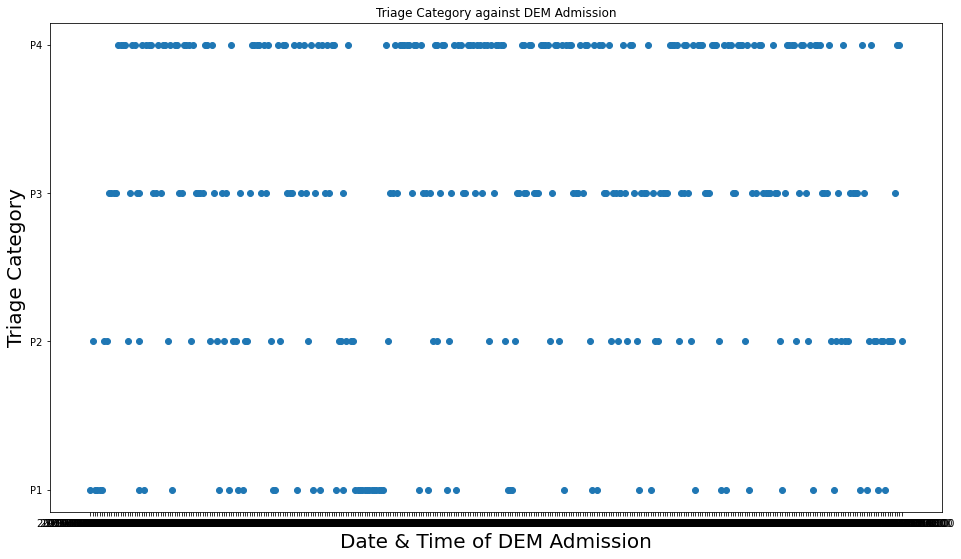

In [16]:
# Charting our time-series

# Establish the size of the figure.
plt.figure(figsize = (16, 9))

# Create scatterplot of high prices versus volume.
plt.scatter(data['Date & Time of DEM Admission'],
            data['Triage Category']);

plt.title("Triage Category against DEM Admission")
plt.ylabel("Triage Category", fontsize = 20)
plt.xlabel("Date & Time of DEM Admission", fontsize = 20);

# It's not very obvious to see when are the peak timings.

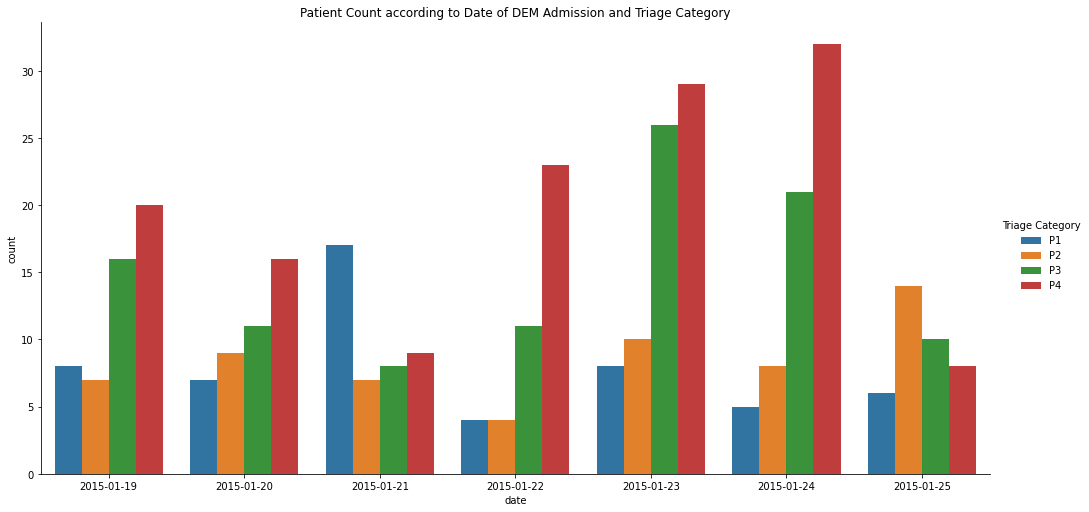

In [17]:
# Break down the priority admission according to the date and the priority
g = sns.catplot(x="date", hue="Triage Category",
                data=data, kind="count",
               height=7, aspect=2).set(title='Patient Count according to Date of DEM Admission and Triage Category')

In [18]:
# Lowest admission for P1 and P2 is mostly from Monday to Thursday, with the exception of Wednesday.
# Friday is the busiest day

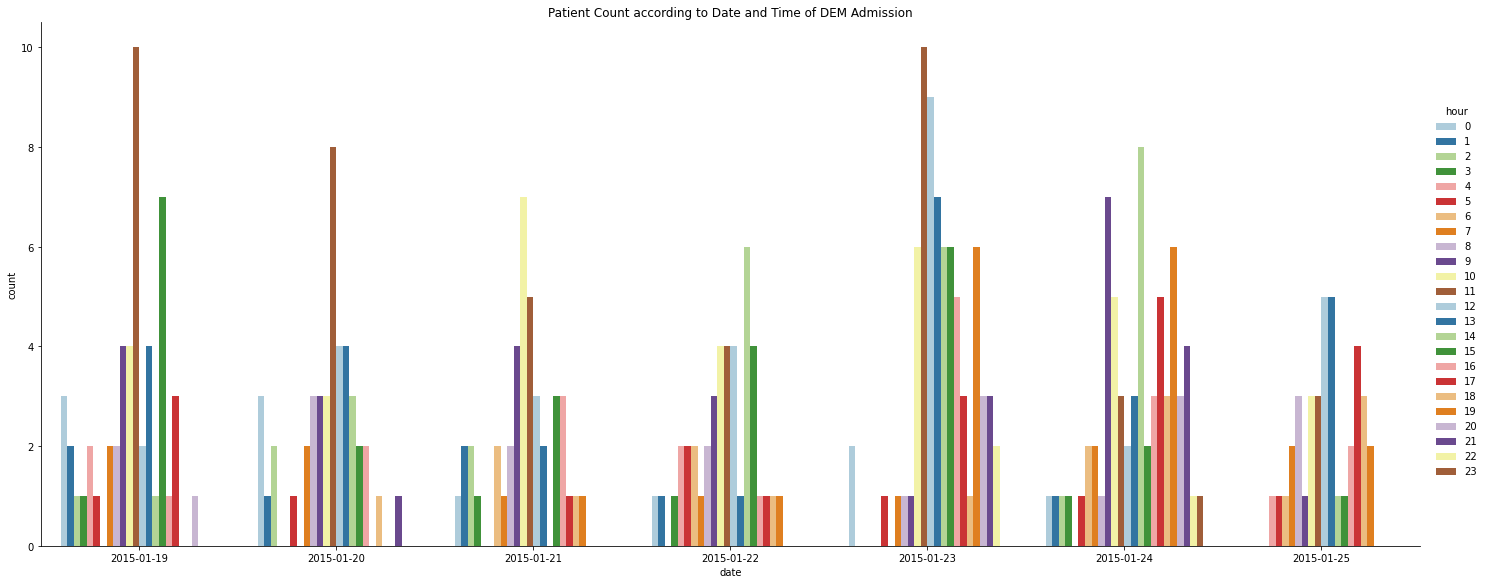

In [19]:
# Plot against the hours according to the date (disregarding Triage Category)
t = sns.catplot(x="date", hue="hour",
                data=data, kind="count",
                height=8,
                aspect=20/8,
                palette="Paired").set(title='Patient Count according to Date and Time of DEM Admission')
                

In [43]:
P1 = data[data['Triage Category'] == 'P1']
P2 = data[data['Triage Category'] == 'P2']
P3 = data[data['Triage Category'] == 'P3']
P4 = data[data['Triage Category'] == 'P4']

In [45]:
triage_list = ['P3', 'P4']

p3and4 = data[data['Triage Category'].isin(triage_list)]
p3and4

,Patient No.,Date & Time of DEM Admission,Triage Category,Inpatient Ward Destination,date,hour,minute,second
8,9,2015-01-19 08:57:00,P3,NaN,2015-01-19,8,57,0
9,10,2015-01-19 00:52:00,P3,NaN,2015-01-19,0,52,0
10,11,2015-01-19 08:34:00,P3,NaN,2015-01-19,8,34,0
11,12,2015-01-19 09:03:00,P3,NaN,2015-01-19,9,3,0
12,13,2015-01-19 04:59:00,P4,NaN,2015-01-19,4,59,0
...,...,...,...,...,...,...,...,...
337,338,2015-01-25 07:59:00,P3,W53,2015-01-25,7,59,0
340,341,2015-01-25 15:56:00,P4,NaN,2015-01-25,15,56,0
350,351,2015-01-25 13:34:00,P3,DEM OW,2015-01-25,13,34,0
351,352,2015-01-25 19:19:00,P4,NaN,2015-01-25,19,19,0


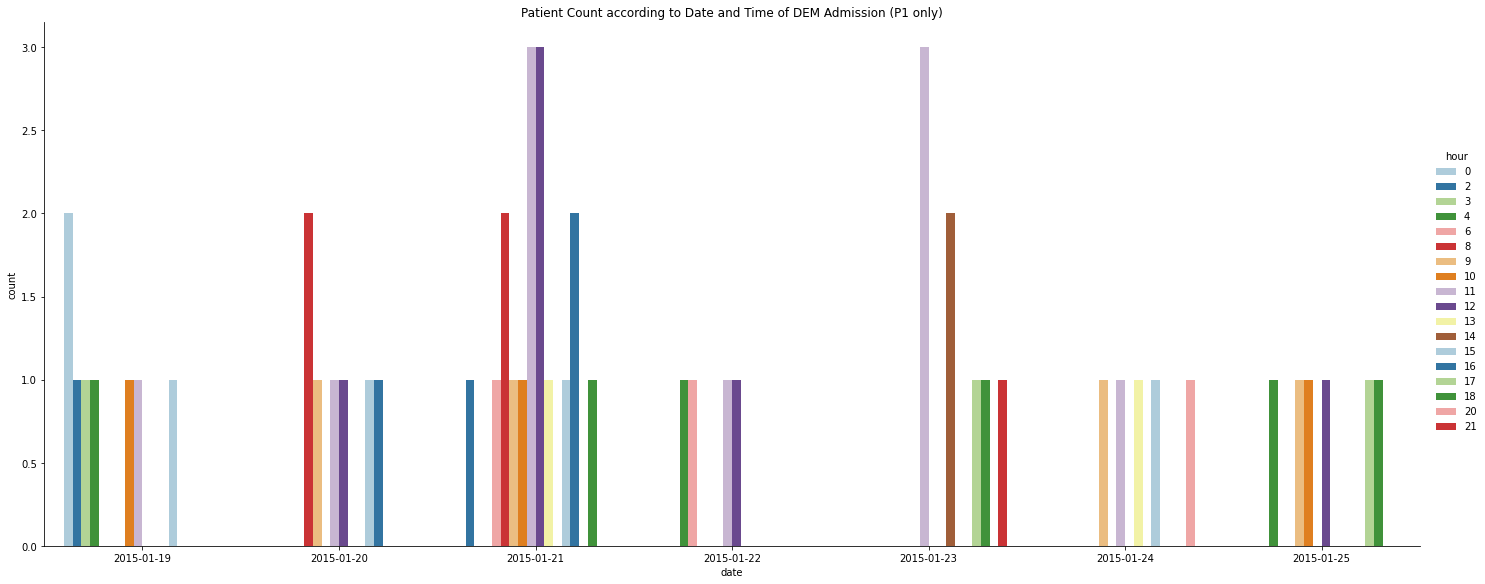

In [22]:
p1_data = sns.catplot(x="date", hue="hour",
                data=P1, kind="count",
                height=8,
                aspect=20/8,
                palette="Paired").set(title='Patient Count according to Date and Time of DEM Admission (P1 only)')

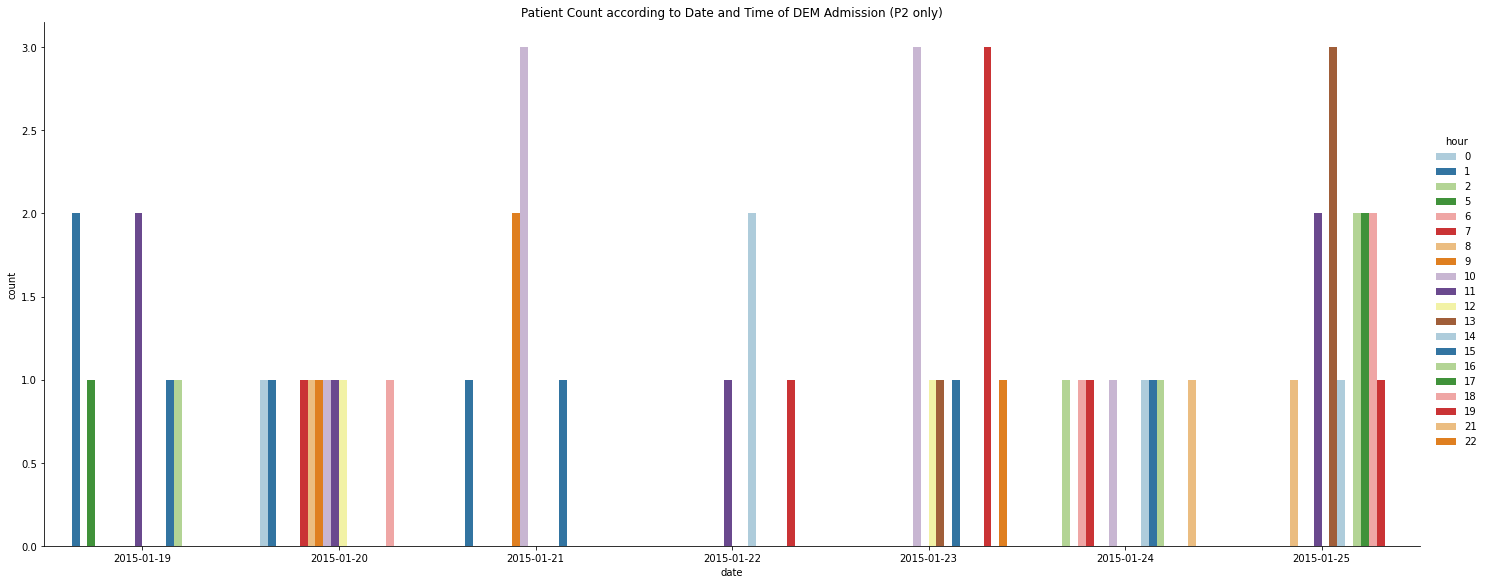

In [23]:
p2_data = sns.catplot(x="date", hue="hour",
                data=P2, kind="count",
                height=8,
                aspect=20/8,
                palette="Paired").set(title='Patient Count according to Date and Time of DEM Admission (P2 only)')

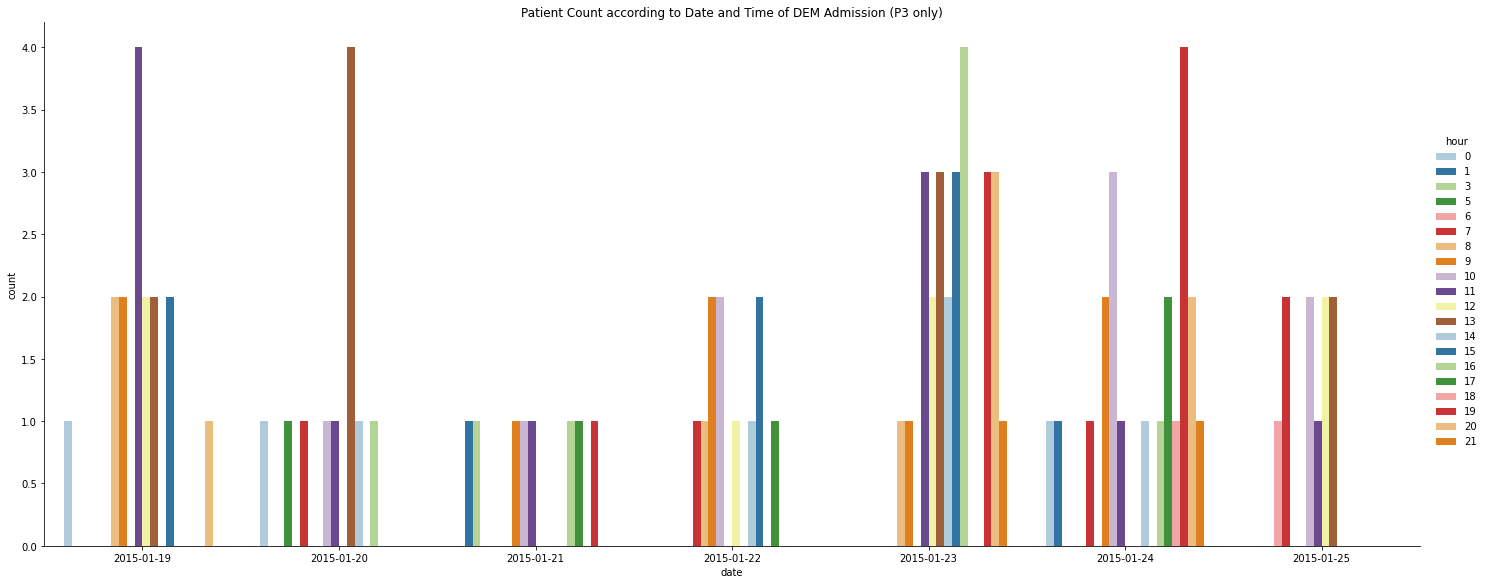

In [24]:
p3_data = sns.catplot(x="date", hue="hour",
                data=P3, kind="count",
                height=8,
                aspect=20/8,
                palette="Paired").set(title='Patient Count according to Date and Time of DEM Admission (P3 only)')

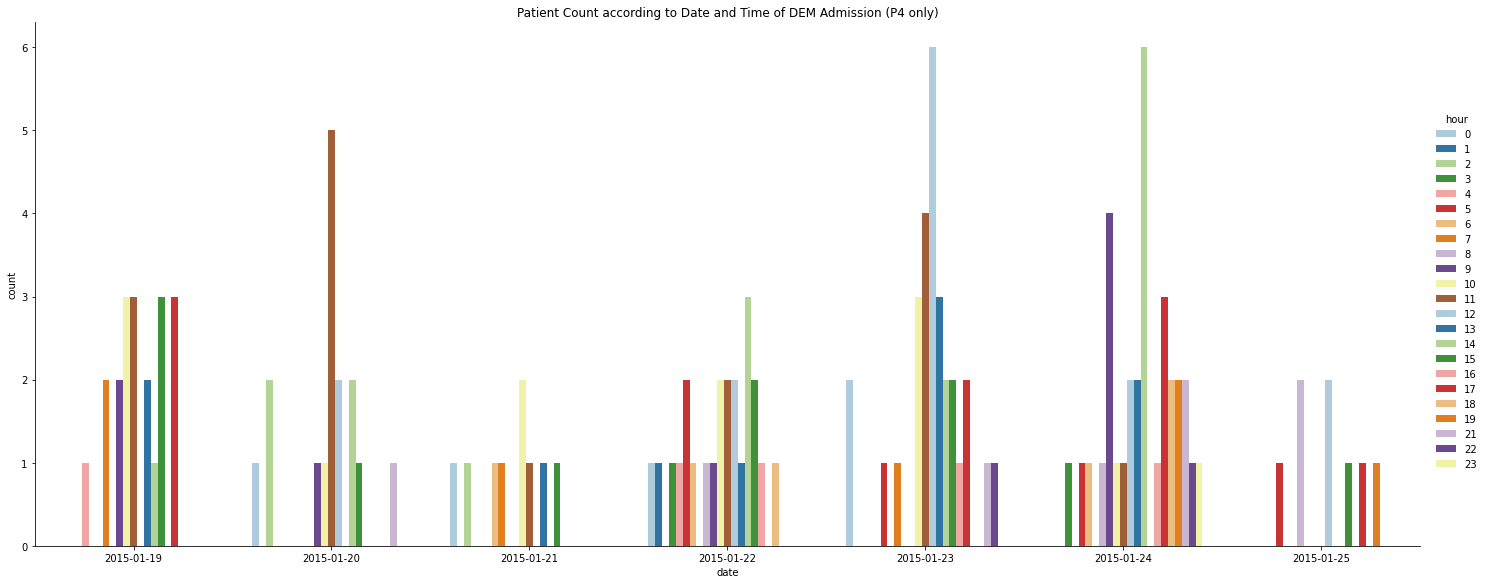

In [47]:
p4_data = sns.catplot(x="date", hue="hour",
                data=P4, kind="count",
                height=8,
                aspect=20/8,
                palette="Paired").set(title='Patient Count according to Date and Time of DEM Admission (P4 only)')

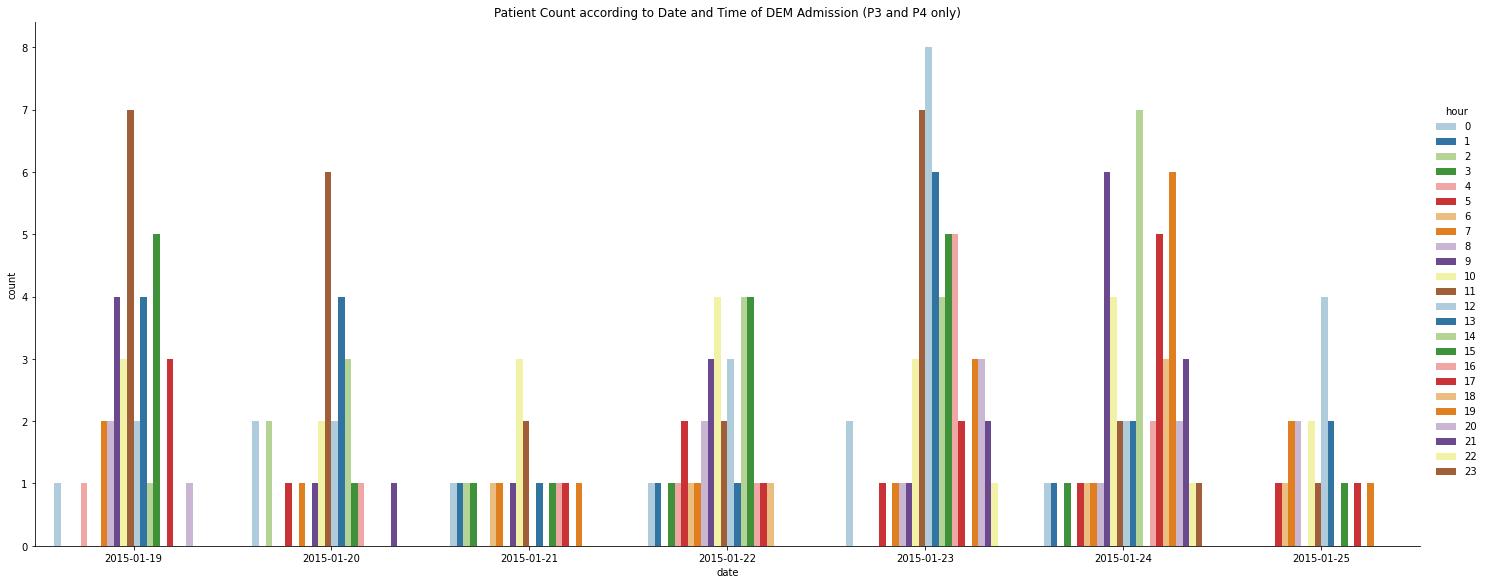

In [46]:
p3and4_data = sns.catplot(x="date", hue="hour",
                data=p3and4, kind="count",
                height=8,
                aspect=20/8,
                palette="Paired").set(title='Patient Count according to Date and Time of DEM Admission (P3 and P4 only)')

# Inpatient Ward Destination

In [ ]:
data.keys()

In [ ]:
data[data['Inpatient Ward Destination'].notna()].count()